In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ports_final.csv")
df

,geo_name,date_year,date_month,vessel_type,total,ships_from_ukraine,ships_from_russia,ships_through_suez,ships_through_bosphorus,longitude,latitude,iso2,date
0,Bosphorus (TR),2019,1,Cargo,1359,658,642,63,1359,29.071833,41.118333,Bosphorus Strait,2019-01-01
1,Bosphorus (TR),2019,1,Tanker,443,74,293,33,443,29.071833,41.118333,Bosphorus Strait,2019-01-01
2,DORALEH (DJ),2019,1,Cargo,98,1,3,16,4,43.083333,11.600000,DJ,2019-01-01
3,DORALEH (DJ),2019,1,Tanker,30,0,0,2,0,43.083333,11.600000,DJ,2019-01-01
4,AIN SUKHNA TERMINAL (EG),2019,1,Cargo,4,0,1,0,2,32.366667,29.583333,EG,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,RENI (UA),2023,10,Tanker,53,53,1,1,28,28.300000,45.433333,UA,2023-10-01
7420,SEVASTOPOL (UA),2023,10,Tanker,1,1,0,0,1,33.533333,44.616667,UA,2023-10-01
7421,UST-DUNAISK (UA),2023,10,Tanker,22,22,0,0,16,29.700000,45.466667,UA,2023-10-01
7422,YALTA (UA),2023,10,Tanker,1,1,1,1,1,34.166667,44.483333,UA,2023-10-01


In [3]:
# treat straits as own countries
# df.loc[df["geo_name"] == "Suez (EG)", "iso2"] = "Suez Canal"
# df.loc[df["geo_name"] == "Bosphorus (TR)", "iso2"] = "Bosphorus Strait"

In [4]:
# df["date"] = pd.to_datetime(df['date_year'].astype(str) + "-" + df['date_month'].astype(str), format='%Y-%m')
df["date"] = pd.to_datetime(df['date'])
df

,geo_name,date_year,date_month,vessel_type,total,ships_from_ukraine,ships_from_russia,ships_through_suez,ships_through_bosphorus,longitude,latitude,iso2,date
0,Bosphorus (TR),2019,1,Cargo,1359,658,642,63,1359,29.071833,41.118333,Bosphorus Strait,2019-01-01
1,Bosphorus (TR),2019,1,Tanker,443,74,293,33,443,29.071833,41.118333,Bosphorus Strait,2019-01-01
2,DORALEH (DJ),2019,1,Cargo,98,1,3,16,4,43.083333,11.600000,DJ,2019-01-01
3,DORALEH (DJ),2019,1,Tanker,30,0,0,2,0,43.083333,11.600000,DJ,2019-01-01
4,AIN SUKHNA TERMINAL (EG),2019,1,Cargo,4,0,1,0,2,32.366667,29.583333,EG,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7419,RENI (UA),2023,10,Tanker,53,53,1,1,28,28.300000,45.433333,UA,2023-10-01
7420,SEVASTOPOL (UA),2023,10,Tanker,1,1,0,0,1,33.533333,44.616667,UA,2023-10-01
7421,UST-DUNAISK (UA),2023,10,Tanker,22,22,0,0,16,29.700000,45.466667,UA,2023-10-01
7422,YALTA (UA),2023,10,Tanker,1,1,1,1,1,34.166667,44.483333,UA,2023-10-01


In [5]:
sub_df = df[[
    "vessel_type", "total", "ships_from_ukraine", "ships_from_russia",
    # "ships_through_suez", "ships_through_bosphorus",
    "iso2", "date"
]].copy()
# sub_df = sub_df[sub_df["date"] > sub_df["date"].min()]  # the first month won't have correct info on UA,RU,SUEZ,BOSPHORUS
sub_df

,vessel_type,total,ships_from_ukraine,ships_from_russia,iso2,date
0,Cargo,1359,658,642,Bosphorus Strait,2019-01-01
1,Tanker,443,74,293,Bosphorus Strait,2019-01-01
2,Cargo,98,1,3,DJ,2019-01-01
3,Tanker,30,0,0,DJ,2019-01-01
4,Cargo,4,0,1,EG,2019-01-01
...,...,...,...,...,...,...
7419,Tanker,53,53,1,UA,2023-10-01
7420,Tanker,1,1,0,UA,2023-10-01
7421,Tanker,22,22,0,UA,2023-10-01
7422,Tanker,1,1,1,UA,2023-10-01


In [6]:
agg_df = sub_df.groupby(["vessel_type", "iso2", "date"]).sum().reset_index(["iso2", "vessel_type"])
agg_df

,vessel_type,iso2,total,ships_from_ukraine,ships_from_russia
date,,,,,
2019-01-01,Cargo,Bosphorus Strait,1359,658,642
2019-02-01,Cargo,Bosphorus Strait,1310,642,594
2019-03-01,Cargo,Bosphorus Strait,1379,685,620
2019-04-01,Cargo,Bosphorus Strait,1290,627,609
2019-05-01,Cargo,Bosphorus Strait,1277,620,566
...,...,...,...,...,...
2023-06-01,Tanker,UA,211,211,33
2023-07-01,Tanker,UA,201,201,23
2023-08-01,Tanker,UA,207,207,23


In [7]:
agg_df["iso2"].unique()

array(['Bosphorus Strait', 'DJ', 'EG', 'KE', 'MZ', 'RU', 'SD',
       'Suez Canal', 'TZ', 'UA'], dtype=object)

<AxesSubplot: xlabel='date'>

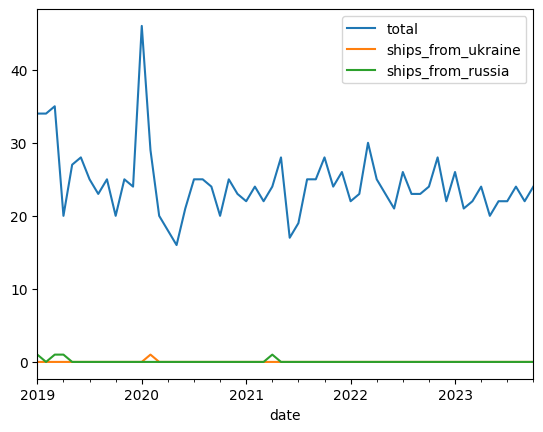

In [8]:
agg_df[(agg_df["vessel_type"] == "Tanker") & (agg_df["iso2"] == "KE")].plot()

<AxesSubplot: xlabel='date'>

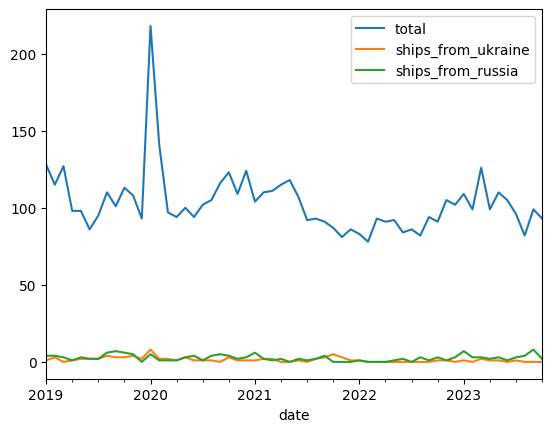

In [9]:
agg_df[(agg_df["vessel_type"] == "Cargo") & (agg_df["iso2"] == "KE")].plot()

<AxesSubplot: xlabel='date'>

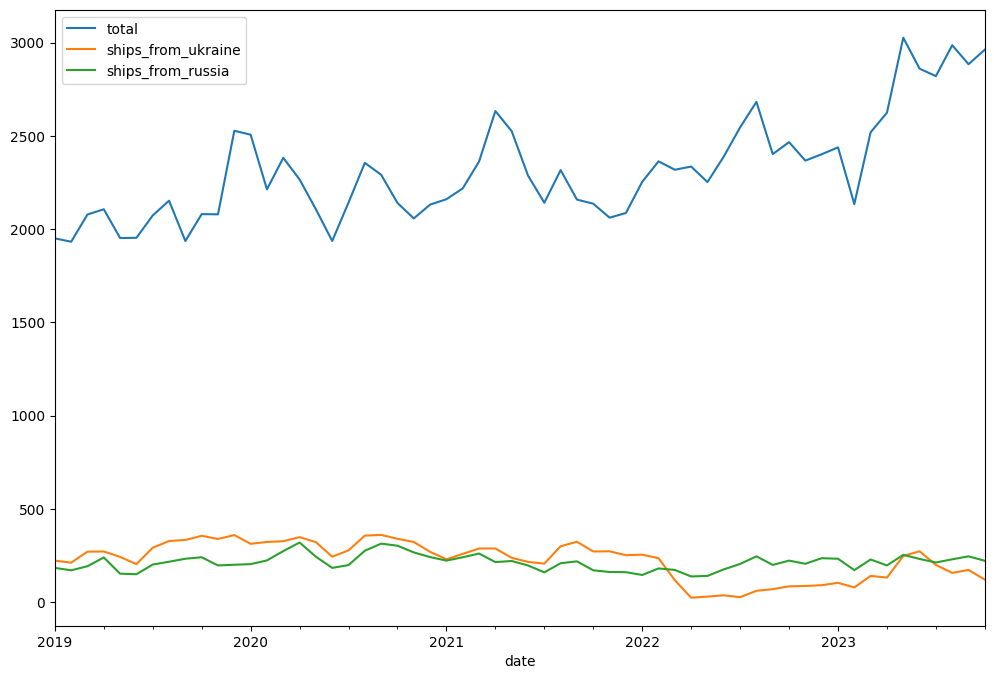

In [10]:
agg_df[(agg_df["vessel_type"] == "Cargo") & (agg_df["iso2"] == "EG")].plot(figsize=(12, 8))

In [11]:
iso2map = {
    "EG": "Egypt",
    "DJ": "Djibouti",
    "KE": "Kenya",
    "MZ": "Mozambique",
    "TZ": "Tanzania",
    "SD": "Sudan",
    "Bosphorus Strait": "Bosphorus Strait",
    "Suez Canal": "Suez Canal",
}

vtypemap = {
    False: "Tanker",
    True: "Cargo",
}

def doplot(is_cargo, iso2):
    agg_df[(agg_df["vessel_type"] == vtypemap[is_cargo]) & (agg_df["iso2"] == iso2)][[
            "ships_from_ukraine", "ships_from_russia",
        # "ships_through_suez", "ships_through_bosphorus"
                                                                                     ]].plot(figsize=(12, 8), title=f"{iso2map[iso2]} ({vtypemap[is_cargo]})")

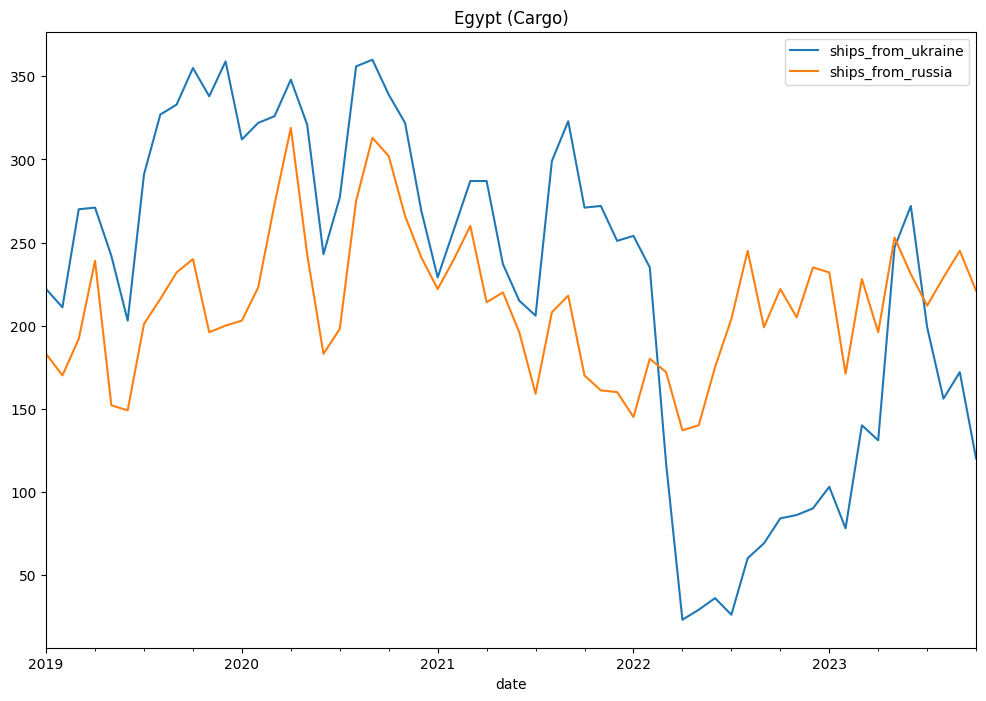

In [12]:
doplot(True, "EG")

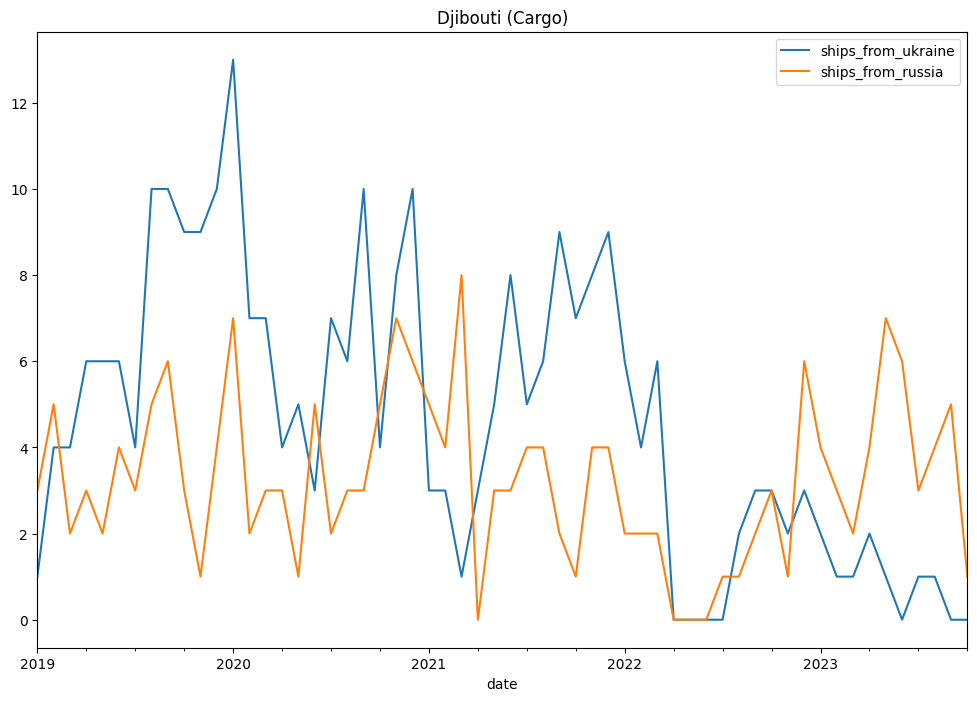

In [13]:
doplot(True, "DJ")

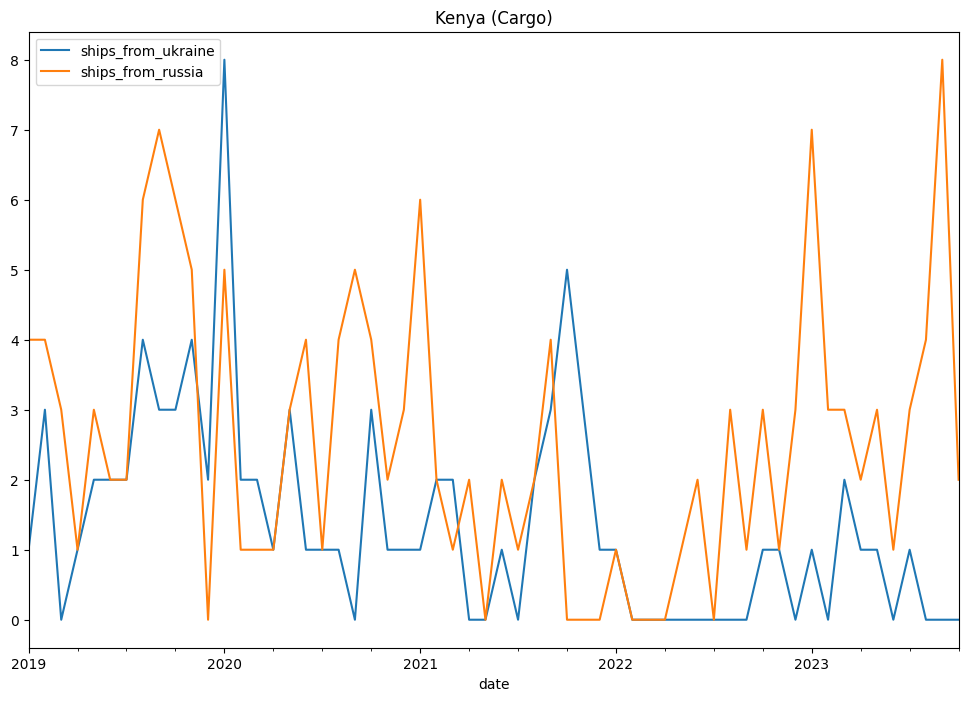

In [14]:
doplot(True, "KE")

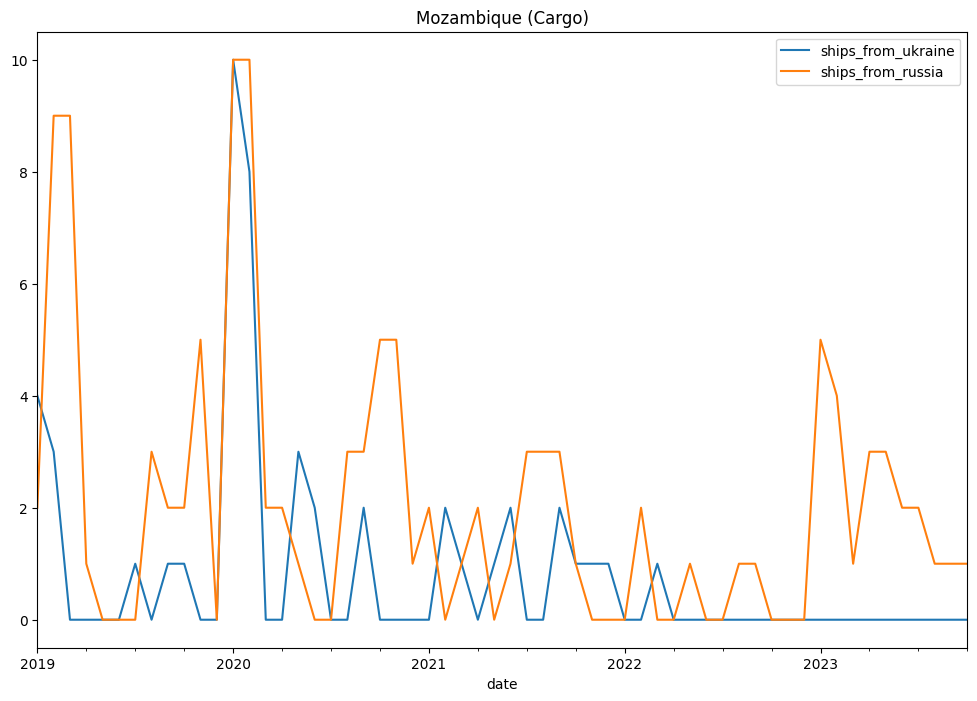

In [15]:
doplot(True, "MZ")

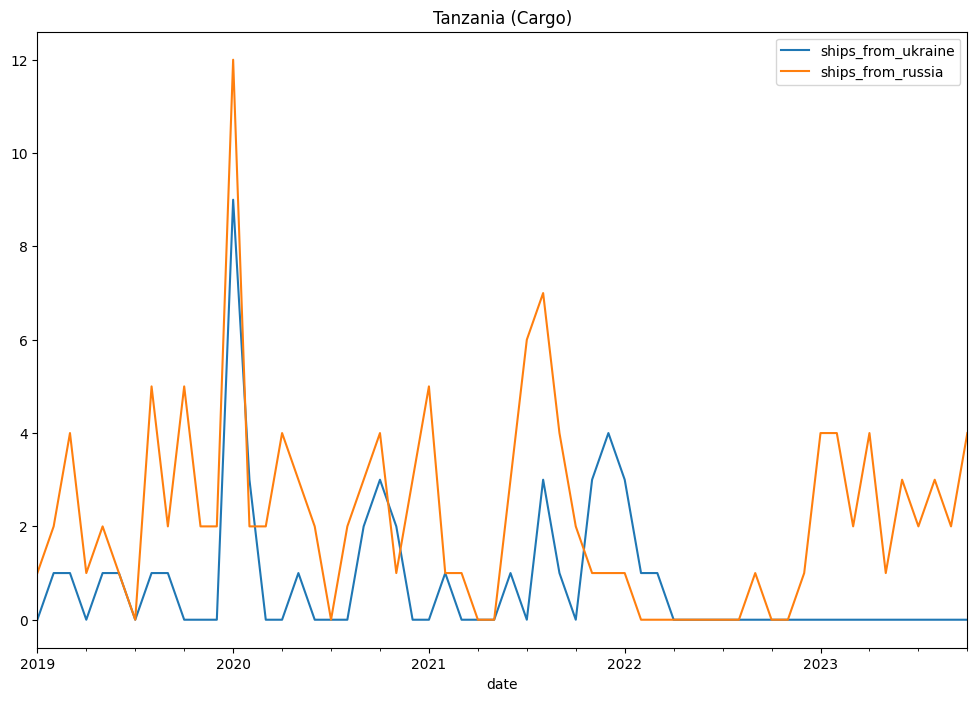

In [16]:
doplot(True, "TZ")

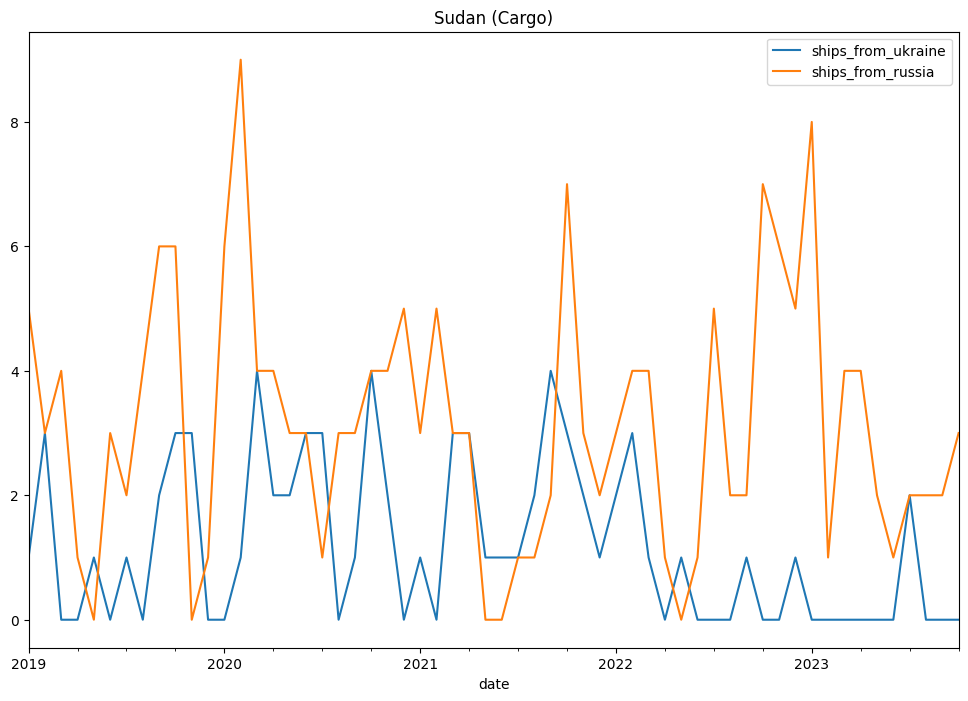

In [17]:
doplot(True, "SD")

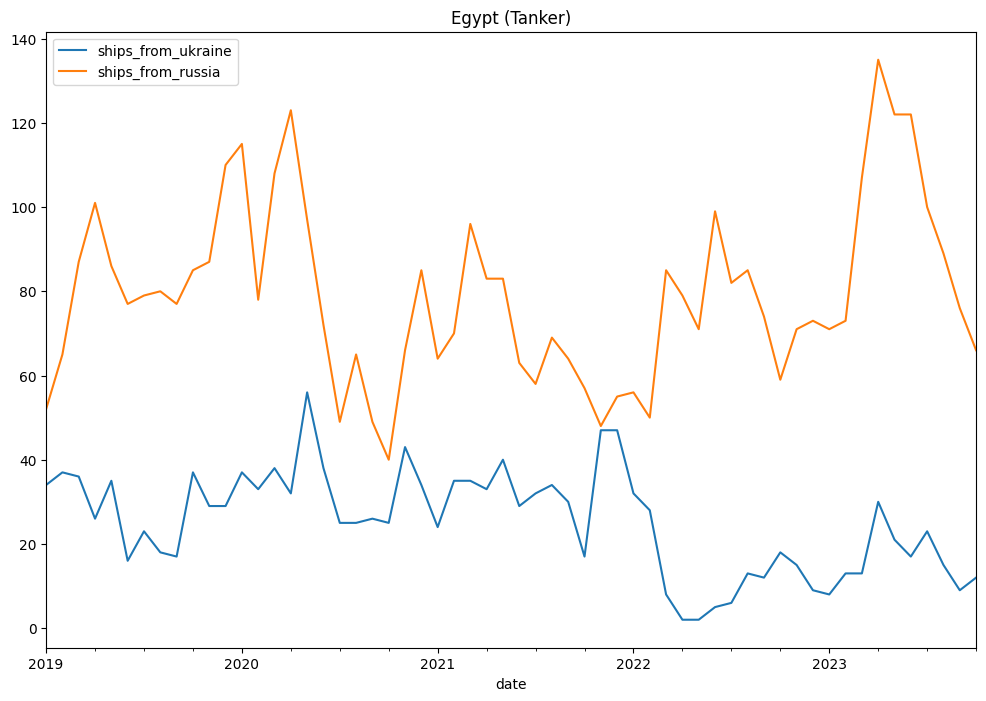

In [18]:
doplot(False, "EG")

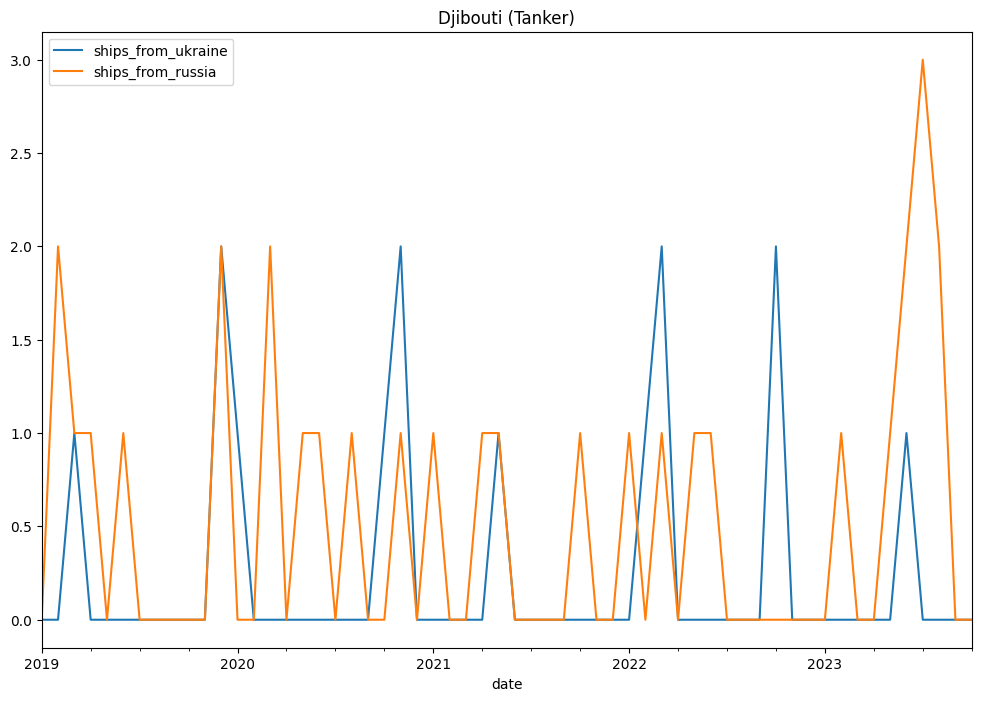

In [19]:
doplot(False, "DJ")

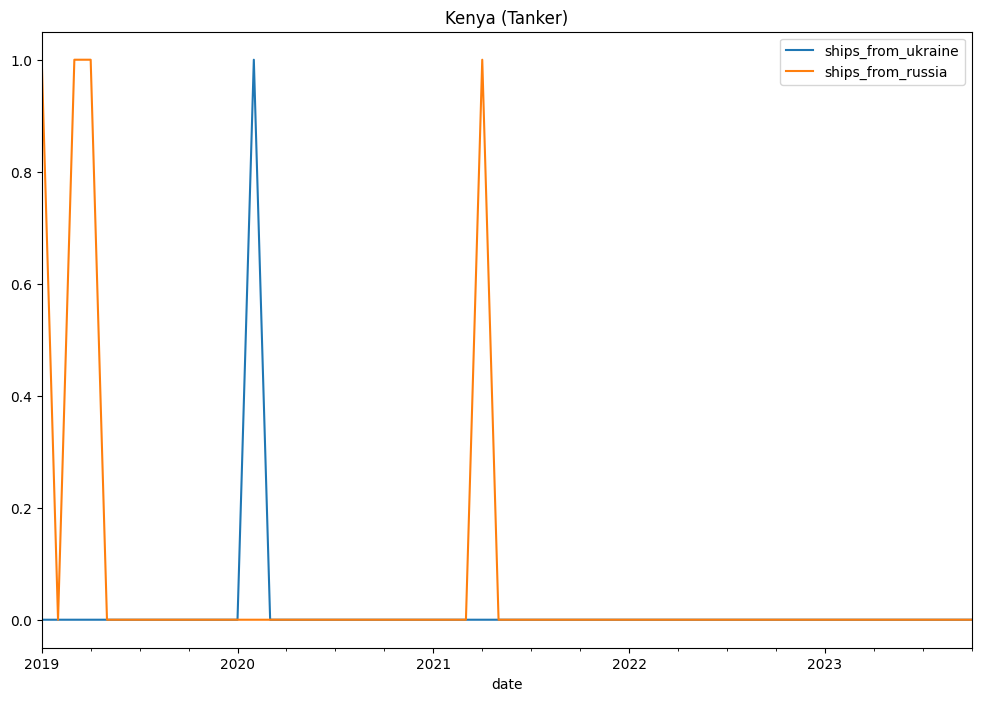

In [20]:
doplot(False, "KE")

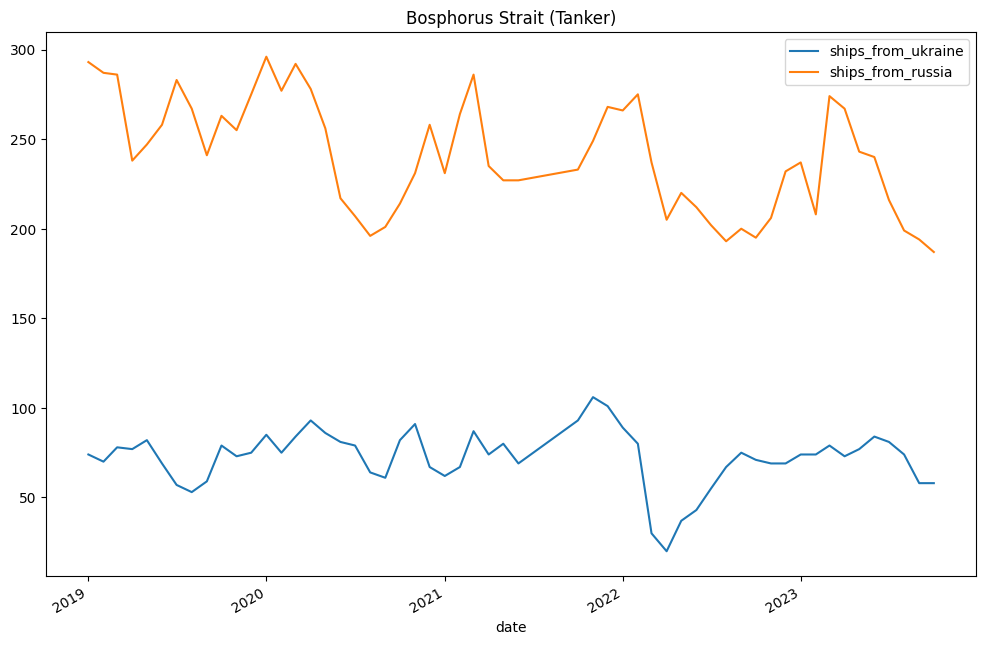

In [21]:
doplot(False, "Bosphorus Strait")

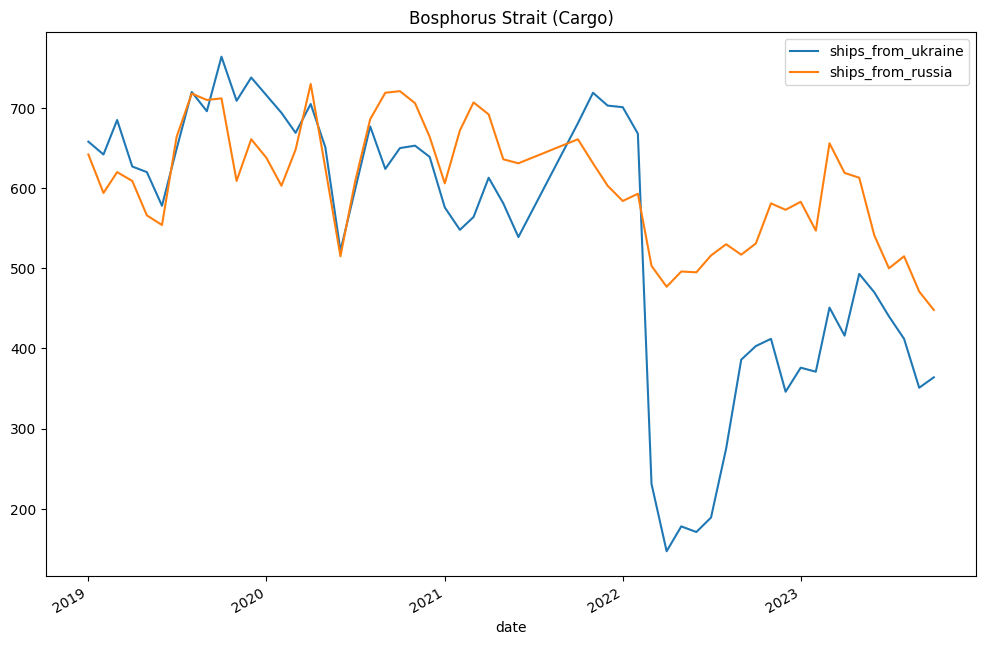

In [22]:
doplot(True, "Bosphorus Strait")

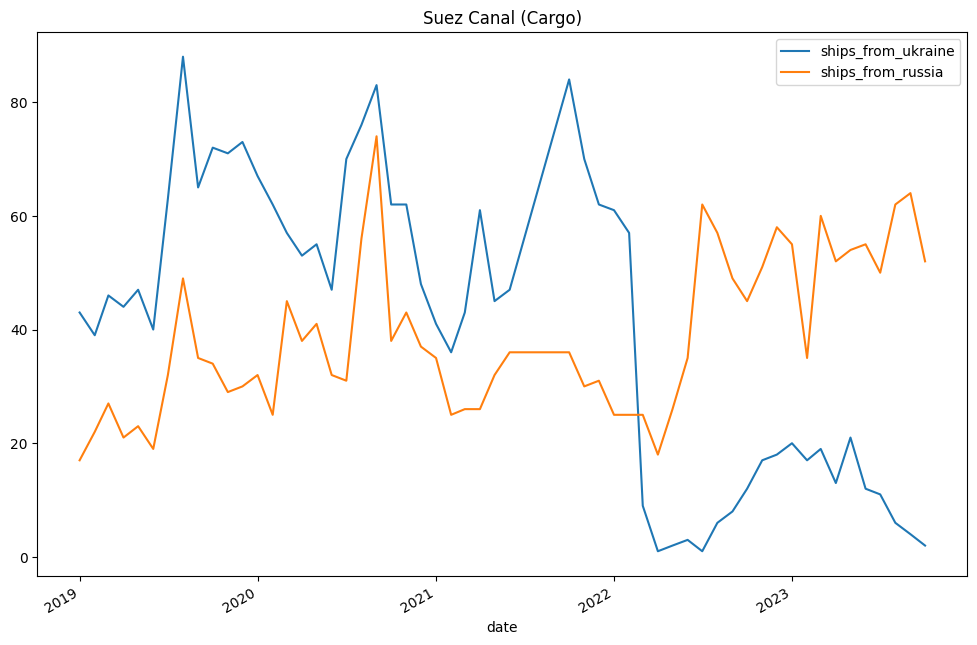

In [23]:
doplot(True, "Suez Canal")

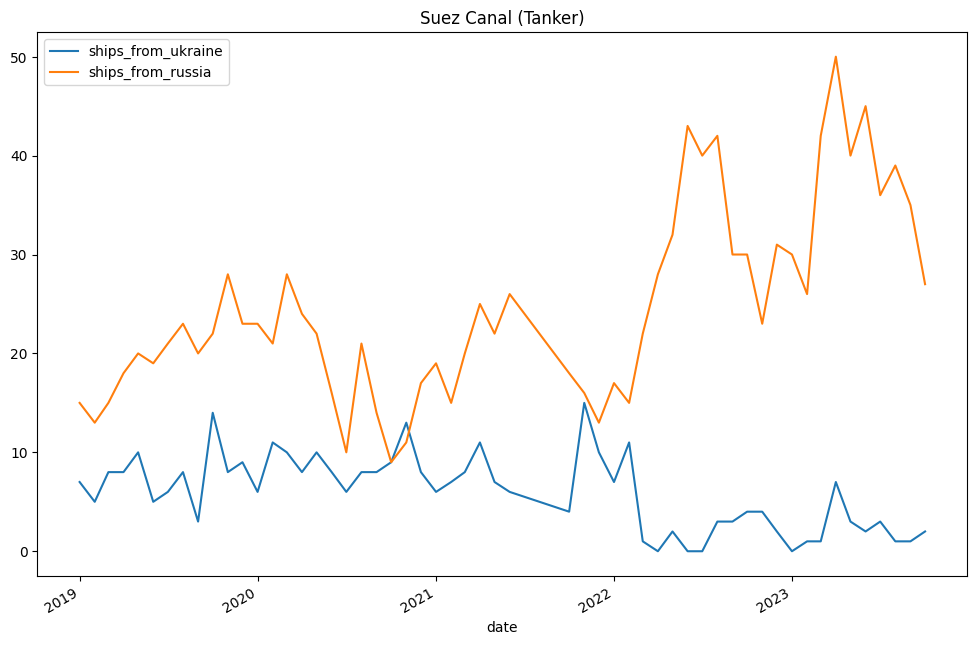

In [24]:
doplot(False, "Suez Canal")

In [25]:
totals = agg_df[(~agg_df["iso2"].isin(["UA", "RU"]))][["vessel_type", "iso2", "total"]].reset_index().pivot_table(index=["date"], columns=["iso2", "vessel_type"], values=["total"], aggfunc="sum")
totals

total                                              \
iso2        Bosphorus Strait            DJ             EG             KE   
vessel_type            Cargo Tanker  Cargo Tanker   Cargo  Tanker  Cargo   
date                                                                       
2019-01-01            1359.0  443.0   98.0   30.0  1950.0   783.0  128.0   
2019-02-01            1310.0  422.0   93.0   32.0  1932.0   741.0  115.0   
2019-03-01            1379.0  423.0  118.0   31.0  2078.0   848.0  127.0   
2019-04-01            1290.0  364.0   95.0   28.0  2106.0   772.0   98.0   
2019-05-01            1277.0  369.0  102.0   26.0  1952.0   772.0   98.0   
2019-06-01            1211.0  381.0   96.0   25.0  1953.0   732.0   86.0   
2019-07-01            1387.0  407.0   86.0   34.0  2073.0   775.0   95.0   
2019-08-01            1456.0  382.0   99.0   21.0  2152.0   793.0  110.0   
2019-09-01            1421.0  379.0  102.0   30.0  1936.0   750.0  101.0   
2019-10-01            1476.0  407.0   96.0   30.0  2080.0   848.0  113.0   
2019-11-01            1374.0  389.0   93.0   30.0  2079.0   879.0  108.0   
2019-12-01            1471.0  432.0  114.0   42.0  2527.0  1040.0   93.0   
2020-01-01            1384.0  462.0  189.0   84.0  2506.0  1033.0  218.0   
2020-02-01            1336.0  425.0  134.0   35.0  2213.0   835.0  141.0   
2020-03-01            1324.0  420.0  110.0   43.0  2382.0   867.0   97.0   
2020-04-01            1435.0  412.0   92.0   29.0  2266.0  1068.0   94.0   
2020-05-01            1313.0  381.0   95.0   31.0  2106.0  1041.0  100.0   
2020-06-01            1119.0  341.0  106.0   31.0  1936.0   864.0   94.0   
2020-07-01            1270.0  339.0  123.0   39.0  2142.0   798.0  102.0   
2020-08-01            1327.0  319.0  125.0   42.0  2355.0   802.0  105.0   
2020-09-01            1304.0  317.0  116.0   39.0  2291.0   775.0  116.0   
2020-10-01            1358.0  362.0  101.0   37.0  2140.0   700.0  123.0   
2020-11-01            1337.0  362.0  101.0   37.0  2057.0   761.0  109.0   
2020-12-01            1296.0  379.0  108.0   32.0  2131.0   839.0  124.0   
2021-01-01            1253.0  377.0  102.0   31.0  2160.0   826.0  104.0   
2021-02-01            1285.0  378.0   81.0   26.0  2218.0   776.0  110.0   
2021-03-01            1313.0  402.0   98.0   24.0  2362.0   853.0  111.0   
2021-04-01            1322.0  355.0   91.0   32.0  2633.0   934.0  115.0   
2021-05-01            1261.0  366.0  106.0   29.0  2525.0   903.0  118.0   
2021-06-01            1229.0  366.0  102.0   29.0  2287.0   823.0  107.0   
2021-07-01               NaN    NaN   95.0   22.0  2141.0   773.0   92.0   
2021-08-01               NaN    NaN   89.0   29.0  2316.0   904.0   93.0   
2021-09-01               NaN    NaN   81.0   26.0  2158.0   857.0   91.0   
2021-10-01            1413.0  406.0   90.0   24.0  2136.0   777.0   87.0   
2021-11-01            1387.0  419.0   91.0   31.0  2061.0   814.0   81.0   
2021-12-01            1407.0  432.0   92.0   26.0  2086.0   818.0   86.0   
2022-01-01            1368.0  447.0   90.0   31.0  2253.0   743.0   83.0   
2022-02-01            1388.0  435.0   96.0   23.0  2363.0   702.0   78.0   
2022-03-01            1084.0  372.0  108.0   26.0  2318.0   838.0   93.0   
2022-04-01            1040.0  347.0   96.0   33.0  2335.0   969.0   91.0   
2022-05-01            1087.0  391.0   96.0   30.0  2252.0   973.0   92.0   
2022-06-01            1097.0  382.0   89.0   35.0  2389.0  1118.0   84.0   
2022-07-01            1121.0  389.0  100.0   40.0  2545.0  1147.0   86.0   
2022-08-01            1170.0  388.0   96.0   31.0  2682.0  1119.0   82.0   
2022-09-01            1211.0  415.0   94.0   32.0  2402.0  1161.0   94.0   
2022-10-01            1294.0  391.0   86.0   30.0  2466.0  1090.0   91.0   
2022-11-01            1365.0  416.0   93.0   31.0  2367.0  1101.0  105.0   
2022-12-01            1319.0  453.0   89.0   31.0  2401.0  1132.0  102.0   
2023-01-01            1313.0  436.0   99.0   22.0  2438.0  1105.0  109.

<AxesSubplot: title={'center': 'totals'}, xlabel='date'>

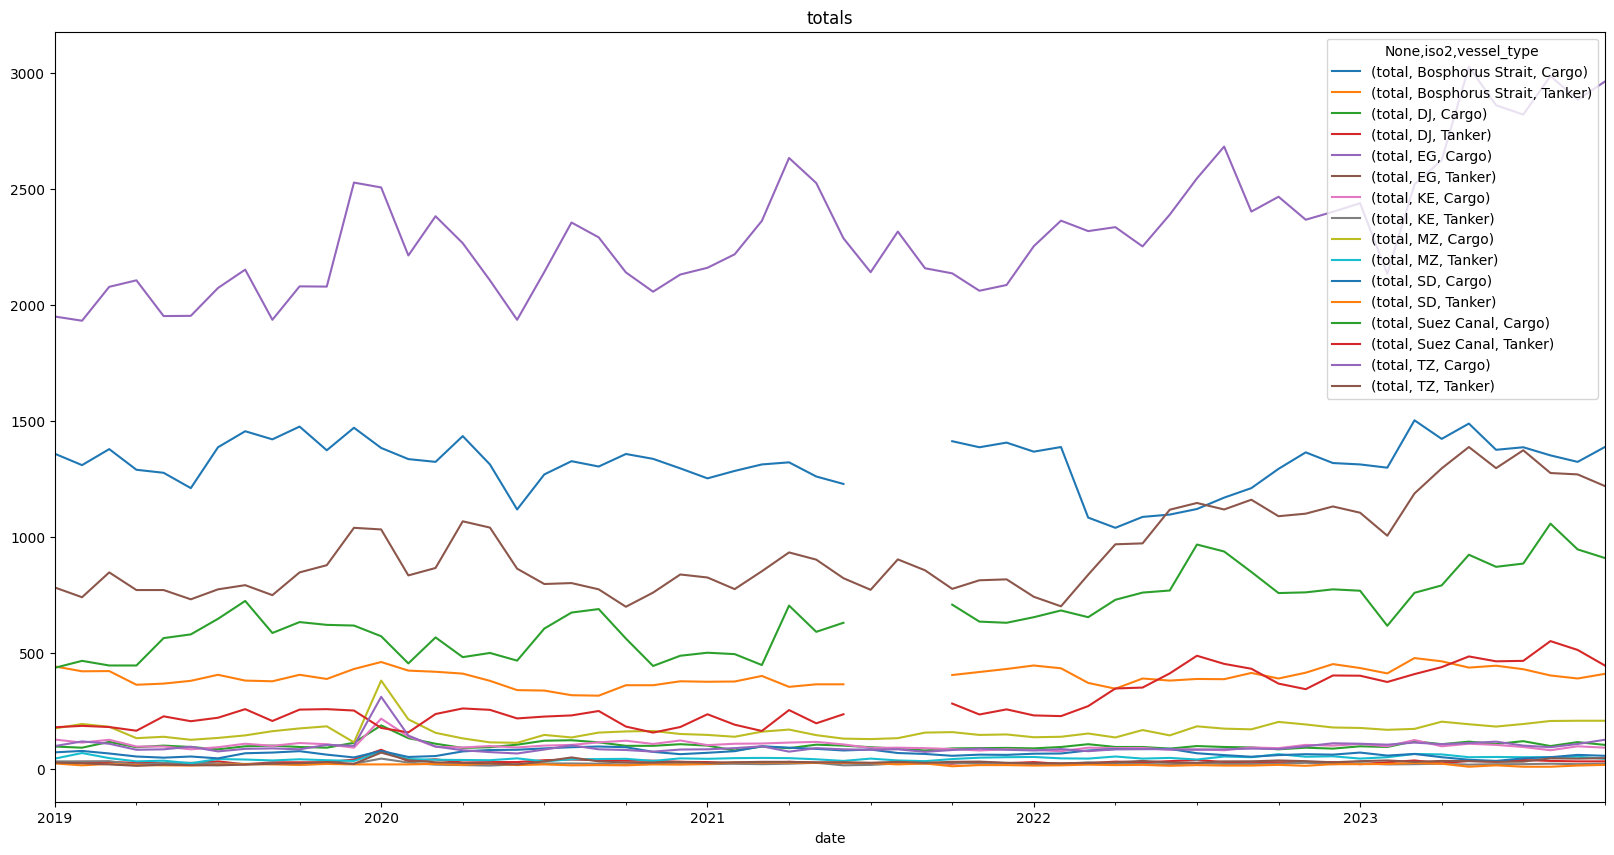

In [26]:
totals.plot(figsize=(20, 10), title="totals")

In [27]:
totals_norm = totals.copy()
totals_norm = totals_norm / totals_norm.max()
totals_norm

total                                          \
iso2        Bosphorus Strait                  DJ                  EG   
vessel_type            Cargo    Tanker     Cargo    Tanker     Cargo   
date                                                                   
2019-01-01          0.904192  0.924843  0.518519  0.357143  0.644415   
2019-02-01          0.871590  0.881002  0.492063  0.380952  0.638467   
2019-03-01          0.917498  0.883090  0.624339  0.369048  0.686715   
2019-04-01          0.858283  0.759916  0.502646  0.333333  0.695968   
2019-05-01          0.849634  0.770355  0.539683  0.309524  0.645076   
2019-06-01          0.805722  0.795407  0.507937  0.297619  0.645406   
2019-07-01          0.922821  0.849687  0.455026  0.404762  0.685063   
2019-08-01          0.968729  0.797495  0.523810  0.250000  0.711170   
2019-09-01          0.945442  0.791232  0.539683  0.357143  0.639788   
2019-10-01          0.982036  0.849687  0.507937  0.357143  0.687376   
2019-11-01          0.914172  0.812109  0.492063  0.357143  0.687046   
2019-12-01          0.978709  0.901879  0.603175  0.500000  0.835096   
2020-01-01          0.920825  0.964509  1.000000  1.000000  0.828156   
2020-02-01          0.888889  0.887265  0.708995  0.416667  0.731328   
2020-03-01          0.880905  0.876827  0.582011  0.511905  0.787178   
2020-04-01          0.954757  0.860125  0.486772  0.345238  0.748843   
2020-05-01          0.873586  0.795407  0.502646  0.369048  0.695968   
2020-06-01          0.744511  0.711900  0.560847  0.369048  0.639788   
2020-07-01          0.844977  0.707724  0.650794  0.464286  0.707865   
2020-08-01          0.882901  0.665971  0.661376  0.500000  0.778255   
2020-09-01          0.867598  0.661795  0.613757  0.464286  0.757105   
2020-10-01          0.903526  0.755741  0.534392  0.440476  0.707204   
2020-11-01          0.889554  0.755741  0.534392  0.440476  0.679775   
2020-12-01          0.862275  0.791232  0.571429  0.380952  0.704230   
2021-01-01          0.833666  0.787056  0.539683  0.369048  0.713814   
2021-02-01          0.854957  0.789144  0.428571  0.309524  0.732981   
2021-03-01          0.873586  0.839248  0.518519  0.285714  0.780568   
2021-04-01          0.879574  0.741127  0.481481  0.380952  0.870126   
2021-05-01          0.838989  0.764092  0.560847  0.345238  0.834435   
2021-06-01          0.817698  0.764092  0.539683  0.345238  0.755783   
2021-07-01               NaN       NaN  0.502646  0.261905  0.707535   
2021-08-01               NaN       NaN  0.470899  0.345238  0.765367   
2021-09-01               NaN       NaN  0.428571  0.309524  0.713153   
2021-10-01          0.940120  0.847599  0.476190  0.285714  0.705882   
2021-11-01          0.922821  0.874739  0.481481  0.369048  0.681097   
2021-12-01          0.936128  0.901879  0.486772  0.309524  0.689359   
2022-01-01          0.910180  0.933194  0.476190  0.369048  0.744547   
2022-02-01          0.923486  0.908142  0.507937  0.273810  0.780899   
2022-03-01          0.721224  0.776618  0.571429  0.309524  0.766028   
2022-04-01          0.691949  0.724426  0.507937  0.392857  0.771646   
2022-05-01          0.723220  0.816284  0.507937  0.357143  0.744217   
2022-06-01          0.729874  0.797495  0.470899  0.416667  0.789491   
2022-07-01          0.745842  0.812109  0.529101  0.476190  0.841044   
2022-08-01          0.778443  0.810021  0.507937  0.369048  0.886319   
2022-09-01          0.805722  0.866388  0.497354  0.380952  0.793787   
2022-10-01          0.860945  0.816284  0.455026  0.357143  0.814937   
2022-11-01          0.908184  0.868476  0.492063  0.369048  0.782221   
2022-12-01          0.877578  0.945720  0.470899  0.369048  0.793457   
2023-01-01          0.873586  0.910230  0.523810  0.261905  0.805684   
2023-02-01          0.864271  0.862213  0.507937  0.357143  0.705221   
2023-03-01          1.000000  1.000000  0.640212  0.452381  0.832452   
2023-04-01          0.946773  0.970772  0.571429  0.309524  0.8

<AxesSubplot: title={'center': 'totals (percentage from max)'}, xlabel='date'>

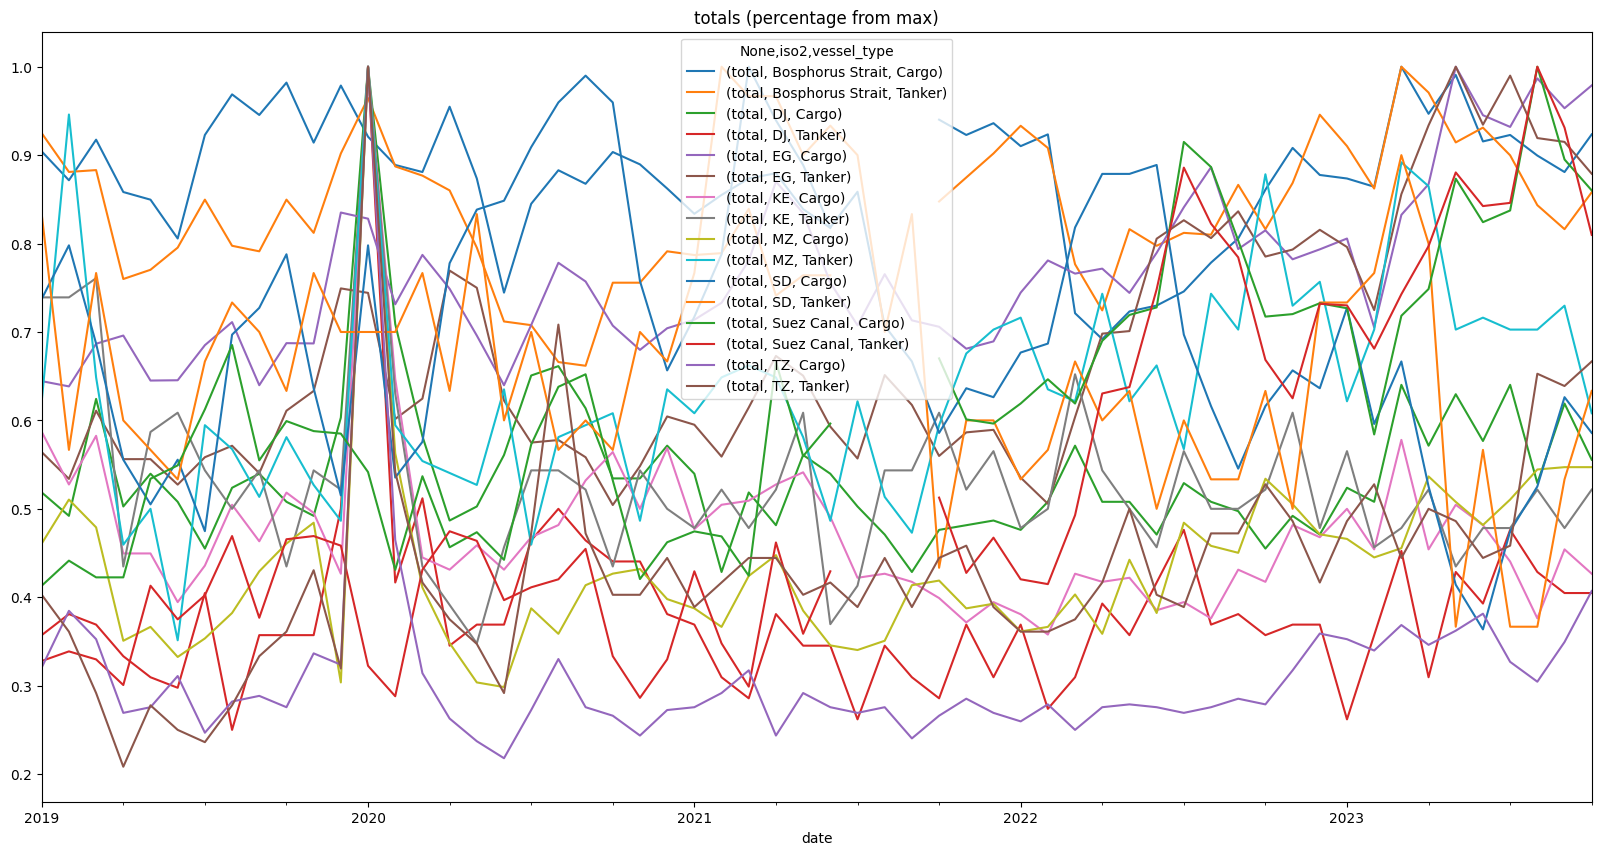

In [28]:
totals_norm.plot(figsize=(20, 10), title="totals (percentage from max)")

In [29]:
totals_norm.columns

MultiIndex([('total', 'Bosphorus Strait',  'Cargo'),
            ('total', 'Bosphorus Strait', 'Tanker'),
            ('total',               'DJ',  'Cargo'),
            ('total',               'DJ', 'Tanker'),
            ('total',               'EG',  'Cargo'),
            ('total',               'EG', 'Tanker'),
            ('total',               'KE',  'Cargo'),
            ('total',               'KE', 'Tanker'),
            ('total',               'MZ',  'Cargo'),
            ('total',               'MZ', 'Tanker'),
            ('total',               'SD',  'Cargo'),
            ('total',               'SD', 'Tanker'),
            ('total',       'Suez Canal',  'Cargo'),
            ('total',       'Suez Canal', 'Tanker'),
            ('total',               'TZ',  'Cargo'),
            ('total',               'TZ', 'Tanker')],
           names=[None, 'iso2', 'vessel_type'])

In [30]:
totals_norm.loc[:, ("total", "Suez Canal", ["Cargo", "Tanker"])]

total          
iso2        Suez Canal          
vessel_type      Cargo    Tanker
date                            
2019-01-01    0.413043  0.327899
2019-02-01    0.441399  0.338768
2019-03-01    0.422495  0.329710
2019-04-01    0.422495  0.300725
2019-05-01    0.534026  0.413043
2019-06-01    0.549149  0.375000
2019-07-01    0.612476  0.402174
2019-08-01    0.685255  0.469203
2019-09-01    0.554820  0.376812
2019-10-01    0.599244  0.465580
2019-11-01    0.587902  0.469203
2019-12-01    0.585066  0.458333
2020-01-01    0.541588  0.322464
2020-02-01    0.431002  0.288043
2020-03-01    0.536862  0.431159
2020-04-01    0.456522  0.474638
2020-05-01    0.473535  0.463768
2020-06-01    0.442344  0.396739
2020-07-01    0.572779  0.411232
2020-08-01    0.637996  0.420290
2020-09-01    0.652174  0.454710
2020-10-01    0.532136  0.333333
2020-11-01    0.420605  0.286232
2020-12-01    0.462193  0.329710
2021-01-01    0.474480  0.429348
2021-02-01    0.468809  0.347826
2021-03-01    0.424386  0.298913
2021-04-01    0.666352  0.461957
2021-05-01    0.559546  0.358696
2021-06-01    0.596408  0.429348
2021-07-01         NaN       NaN
2021-08-01         NaN       NaN
2021-09-01         NaN       NaN
2021-10-01    0.670132  0.512681
2021-11-01    0.601134  0.427536
2021-12-01    0.596408  0.467391
2022-01-01    0.619093  0.420290
2022-02-01    0.646503  0.414855
2022-03-01    0.619093  0.492754
2022-04-01    0.689981  0.630435
2022-05-01    0.719282  0.637681
2022-06-01    0.727788  0.748188
2022-07-01    0.914934  0.885870
2022-08-01    0.886578  0.822464
2022-09-01    0.803403  0.784420
2022-10-01    0.717391  0.668478
2022-11-01    0.720227  0.625000
2022-12-01    0.732514  0.731884
2023-01-01    0.726843  0.730072
2023-02-01    0.584121  0.681159
2023-03-01    0.718336  0.742754
2023-04-01    0.748582  0.797101
2023-05-01    0.873346  0.880435
2023-06-01    0.824197  0.842391
2023-07-01    0.837429  0.846014
2023-08-01    1.000000  1.000000
2023-09-01    0.895085  0.931159
2023-10-01    0.860113  0.809783

<AxesSubplot: title={'center': 'Total Ships on Straits'}, xlabel='date'>

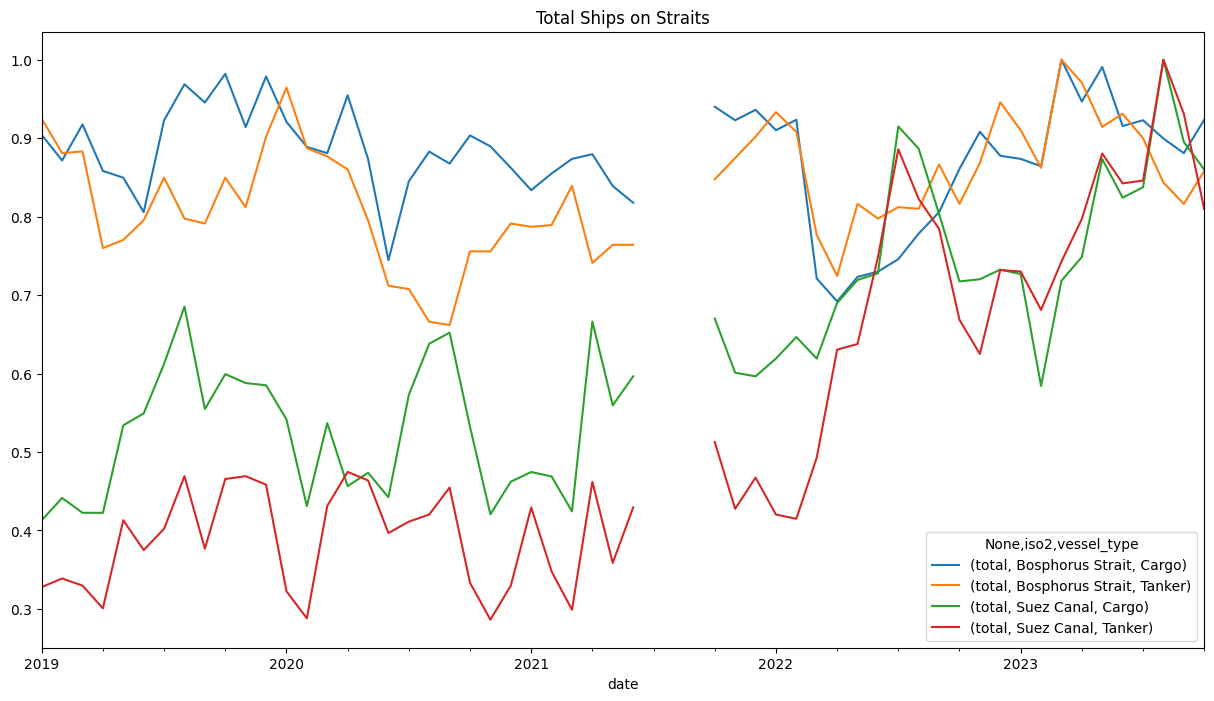

In [31]:
totals_norm.loc[:, ("total", ["Bosphorus Strait", "Suez Canal"], ["Cargo", "Tanker"])].plot(title="Total Ships on Straits", figsize=(15, 8))